In [157]:
import pandas as pd
import json
def file_to_df(file_path):
    file_path = file_path
    with open(file_path,'r')as f:
        data = json.load(f)
    df = pd.DataFrame(data['data'])
    return df

    
file_path = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_match_data.json'
df_match =file_to_df(file_path)
df_match 


,price,sequence,side,size,symbol,time,tradeId,type,time_received,makerOrderId,takerOrderId
0,0.6,5899022371010561,sell,1,QUILL-USDT,1733133600000000000,5899022371010561,match,10:00:00.1037,NaN,NaN
1,0.6444,5899022374156289,buy,57.9,QUILL-USDT,1733133600052000000,5899022374156289,match,10:00:00.1042,674d5cf6f61fa00007fd49f0,674d85208b053b0007dff6e2
2,0.6889,5899022374156292,buy,101.2,QUILL-USDT,1733133600052000000,5899022374156292,match,10:00:00.1043,674d5cf6dcdd7b0007aa3b68,674d85208b053b0007dff6e2
3,0.7333,5899022381234177,buy,146.95,QUILL-USDT,1733133600068000000,5899022381234177,match,10:00:00.1153,674d5cf6812d4000077e2b98,674d85208b053b0007dff73b
4,0.7778,5899022381234180,buy,173.97,QUILL-USDT,1733133600068000000,5899022381234180,match,10:00:00.1260,674d5cf5dcdd7b0007aa36a2,674d85208b053b0007dff73b
...,...,...,...,...,...,...,...,...,...,...,...
4326,1.3625,5899493336037377,sell,1.46,QUILL-USDT,1733134794464000000,5899493336037377,match,10:19:54.5106,674d89a933b8f300077b7268,674d89ca725fc6000721887a
4327,1.3583,5899493336037380,sell,20.97,QUILL-USDT,1733134794464000000,5899493336037380,match,10:19:54.5106,674d89c82033a5000793845b,674d89ca725fc6000721887a
4328,1.353,5899493336037383,sell,2.22,QUILL-USDT,1733134794464000000,5899493336037383,match,10:19:54.5107,674d89b0b6d5080007ca4301,674d89ca725fc6000721887a
4329,1.3627,5899493503154177,buy,18.83,QUILL-USDT,1733134794977000000,5899493503154177,match,10:19:55.0257,674d89c8e21c740007ac5d60,674d89ca439c100007f8a6c7


In [158]:
import pandas as pd
import numpy as np

def prep_timestamp_column(df):
    """
    Prepare timestamp column by standardizing to milliseconds

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with timestamp column
    Returns:
    --------
    pandas.DataFrame
        DataFrame with converted timestamp column
    """
    # Identify the timestamp column
    possible_cols = ['time', 'timestamp']
    col_name = next((col for col in possible_cols if col in df.columns), None)
    if col_name is None:
        raise ValueError("DataFrame must contain either 'time' or 'timestamp' column")
    
    # Vectorized standardization
    def standardize_timestamps(series):
        # Convert to numeric, coercing errors to NaN
        numeric_series = pd.to_numeric(series, errors='coerce')
        # Handle NaN values
        numeric_series = numeric_series.fillna(0)
        # Convert to string and handle integer/float inputs
        ts_str = numeric_series.astype(str).str.split('.').str[0]
        # Trim long timestamps
        ts_str = ts_str.str.slice(0, 13)
        # Pad short timestamps
        ts_str = ts_str.str.pad(13, side='right', fillchar='0')
        return ts_str.astype(np.int64)
    
    # Standardize timestamps
    df['timestamp'] = standardize_timestamps(df[col_name])
    # Convert to datetime using milliseconds
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    # Drop the original column if it's different from 'timestamp'
    if col_name != 'timestamp':
        df.drop(columns=[col_name], inplace=True)
    
    return df
prep_timestamp_column(df_match)
df_match

,price,sequence,side,size,symbol,tradeId,type,time_received,makerOrderId,takerOrderId,timestamp
0,0.6,5899022371010561,sell,1,QUILL-USDT,5899022371010561,match,10:00:00.1037,NaN,NaN,2024-12-02 10:00:00.000
1,0.6444,5899022374156289,buy,57.9,QUILL-USDT,5899022374156289,match,10:00:00.1042,674d5cf6f61fa00007fd49f0,674d85208b053b0007dff6e2,2024-12-02 10:00:00.052
2,0.6889,5899022374156292,buy,101.2,QUILL-USDT,5899022374156292,match,10:00:00.1043,674d5cf6dcdd7b0007aa3b68,674d85208b053b0007dff6e2,2024-12-02 10:00:00.052
3,0.7333,5899022381234177,buy,146.95,QUILL-USDT,5899022381234177,match,10:00:00.1153,674d5cf6812d4000077e2b98,674d85208b053b0007dff73b,2024-12-02 10:00:00.068
4,0.7778,5899022381234180,buy,173.97,QUILL-USDT,5899022381234180,match,10:00:00.1260,674d5cf5dcdd7b0007aa36a2,674d85208b053b0007dff73b,2024-12-02 10:00:00.068
...,...,...,...,...,...,...,...,...,...,...,...
4326,1.3625,5899493336037377,sell,1.46,QUILL-USDT,5899493336037377,match,10:19:54.5106,674d89a933b8f300077b7268,674d89ca725fc6000721887a,2024-12-02 10:19:54.464
4327,1.3583,5899493336037380,sell,20.97,QUILL-USDT,5899493336037380,match,10:19:54.5106,674d89c82033a5000793845b,674d89ca725fc6000721887a,2024-12-02 10:19:54.464
4328,1.353,5899493336037383,sell,2.22,QUILL-USDT,5899493336037383,match,10:19:54.5107,674d89b0b6d5080007ca4301,674d89ca725fc6000721887a,2024-12-02 10:19:54.464
4329,1.3627,5899493503154177,buy,18.83,QUILL-USDT,5899493503154177,match,10:19:55.0257,674d89c8e21c740007ac5d60,674d89ca439c100007f8a6c7,2024-12-02 10:19:54.977


In [164]:

def adjust_columns_and_types(df):
    list_to_drop = ['sequence', 'symbol', 'tradeId', 'type', 'makerOrderId', 'takerOrderId','time_received']

    for column in list_to_drop:
        if column in df.columns:
            df = df.drop(column, axis=1)

    # Convert columns to appropriate data types
    df['price'] = df['price'].astype(float)
    df['side'] = df['side'].astype(str)
    df['size'] = df['size'].astype(float)

    return df
df_match = adjust_columns_and_types(df_match)
df_match.info()
df_match.to_pickle('/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_match_data_DF_preped.pkl')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   price      4331 non-null   float64       
 1   side       4331 non-null   object        
 2   size       4331 non-null   float64       
 3   timestamp  4331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 135.5+ KB


In [163]:
import pandas as pd
import numpy as np
def aggregate_trades(df, interval_seconds=1):
    """
    Aggregate trades from a DataFrame over specified time intervals.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with trade data
        Expected columns: 'price', 'side', 'size', 'timestamp', 'time_received'
    interval_seconds : int, optional
        Size of time interval for aggregation (default is 1 second)
    
    Returns:
    --------
    pandas.DataFrame
        Aggregated trade data with columns:
        - interval_start
        - buy_volume
        - sell_volume
        - trade_count
    """
    # Ensure we're working with a copy to avoid modifying the original DataFrame
    df = df.copy()
    
    # Round timestamps to the nearest interval
    df['interval_start'] = df['timestamp'].dt.floor(f'{interval_seconds}s')
    
    # Separate buy and sell trades
    buy_trades = df[df['side'] == 'buy']
    sell_trades = df[df['side'] == 'sell']
    
    # Group by interval and aggregate
    buy_volumes = buy_trades.groupby('interval_start')['size'].sum().reset_index()
    sell_volumes = sell_trades.groupby('interval_start')['size'].sum().reset_index()
    trade_counts = df.groupby('interval_start')['side'].count().reset_index()
    
    # Merge the aggregations
    aggregated = trade_counts.merge(buy_volumes, on='interval_start', how='outer')
    aggregated = aggregated.merge(sell_volumes, on='interval_start', how='outer')
    
    # Rename columns
    aggregated.columns = ['interval_start', 'trade_count', 'buy_volume', 'sell_volume']
    
    # Replace NaN with 0
    aggregated = aggregated.fillna(0)
    
    # Sort by interval start time
    aggregated = aggregated.sort_values('interval_start')
    
    # Format interval to datetime object
    aggregated['interval_start'] = pd.to_datetime(aggregated['interval_start'], format='%H:%M:%S.%f')
    
    return aggregated

# Aggregate trades
agg_match_df = aggregate_trades(df_match,interval_seconds=10)
agg_match_df.to_pickle('/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_match_data_aggregated.pkl')


<Axes: title={'center': 'Buy and Sell Volume per Second'}, xlabel='interval_start'>

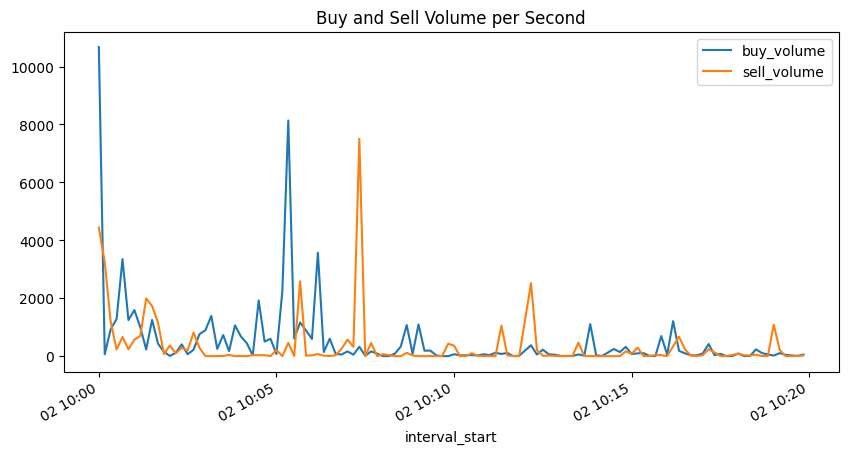

In [149]:
#plot result data 
result.plot(x='interval_start', y=['buy_volume', 'sell_volume'], kind='line', figsize=(10, 5), title='Buy and Sell Volume per Second')


<Axes: title={'center': 'Match Price per Second'}, xlabel='timestamp'>

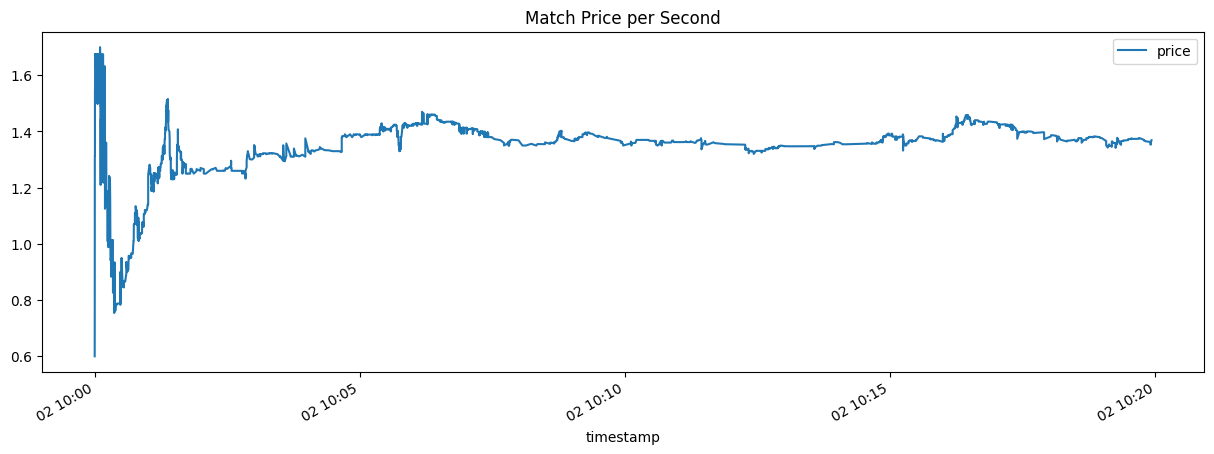

In [150]:
# plot match price data on a line chart with a curser
df.plot(x='timestamp', y='price', kind='line', figsize=(15, 5), title='Match Price per Second')
# df.plot(x='timestamp', y='price', kind='line', figsize=(15, 5), title='Match Price per Second')

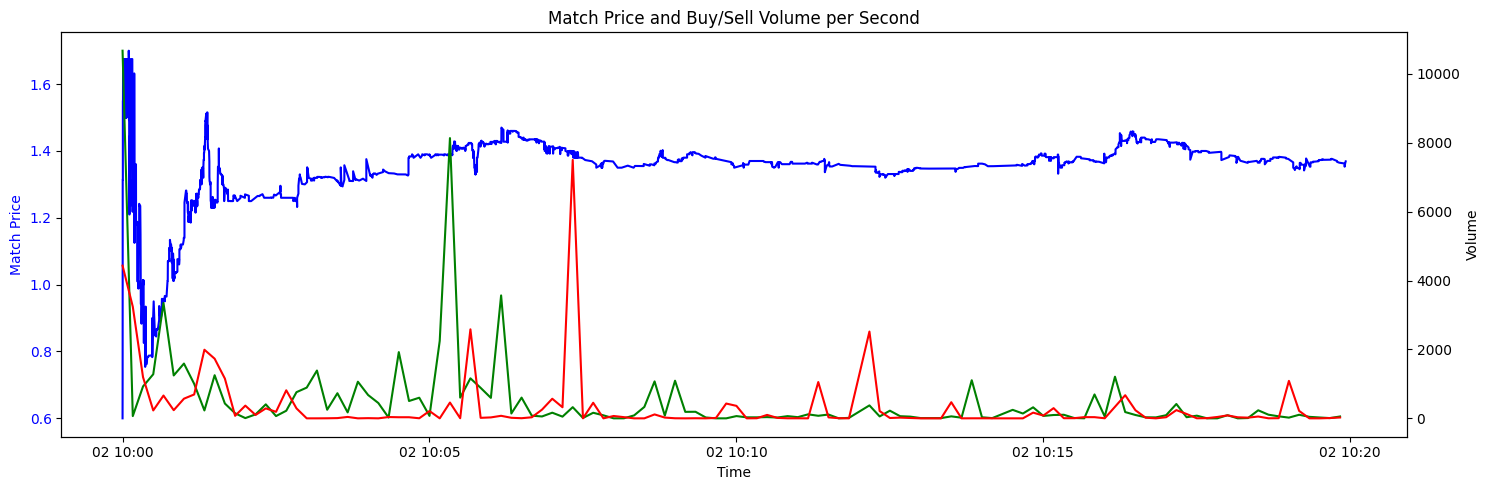

In [151]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot match price data on the first y-axis
ax1.plot(df['timestamp'], df['price'], color='blue', label='Match Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Match Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(result['interval_start'], result['buy_volume'], color='green', label='Buy Volume')
ax2.plot(result['interval_start'], result['sell_volume'], color='red', label='Sell Volume')
ax2.set_ylabel('Volume', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and show the plot
plt.title('Match Price and Buy/Sell Volume per Second')
fig.tight_layout()
plt.show()